# Exploratory Data Analysis Assignment by Aditya Katariya

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles

In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset from URL

In [5]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 1. Basic info

In [6]:
print("Dataset shape:", df.shape)
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))

Dataset shape: (891, 12)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique       

# 2. Missing values heatmap

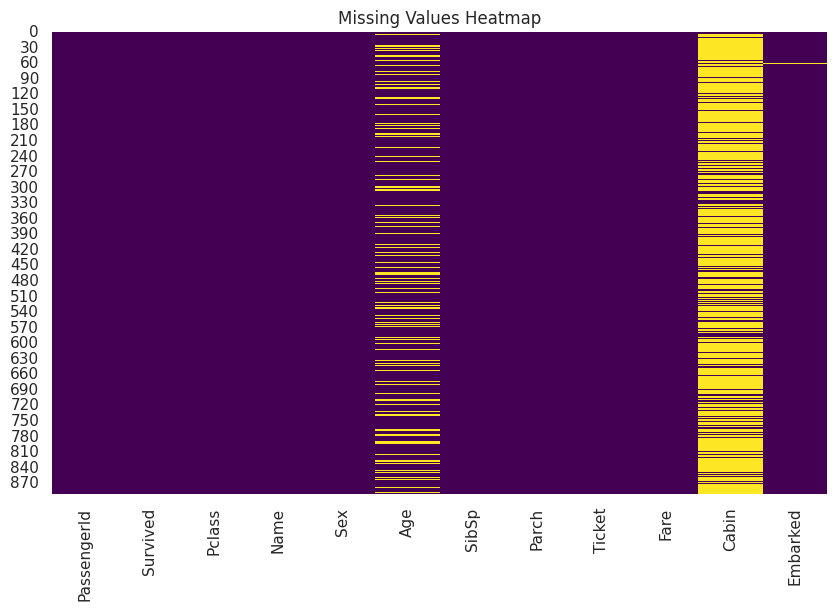

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 3. Categorical data distribution

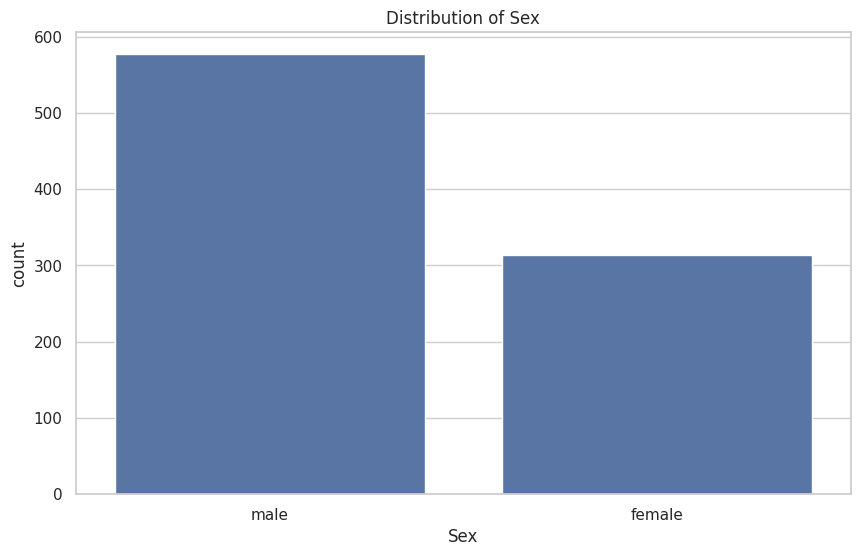

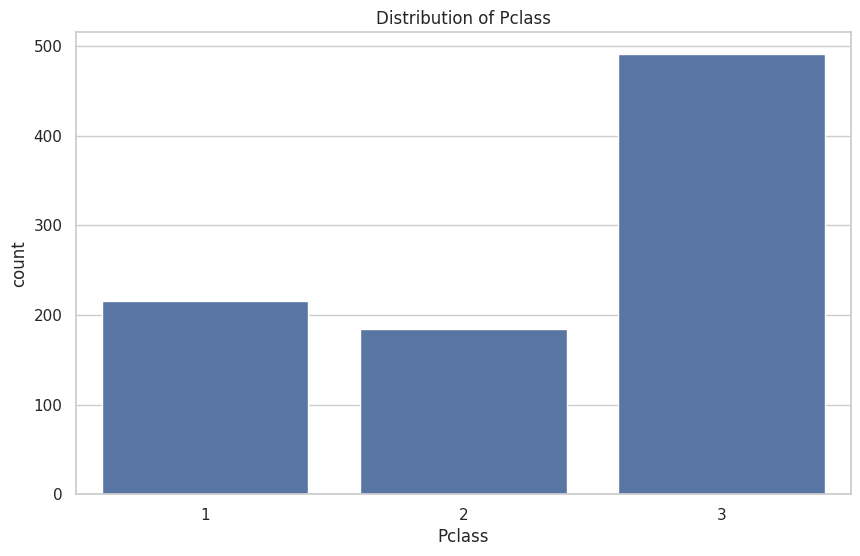

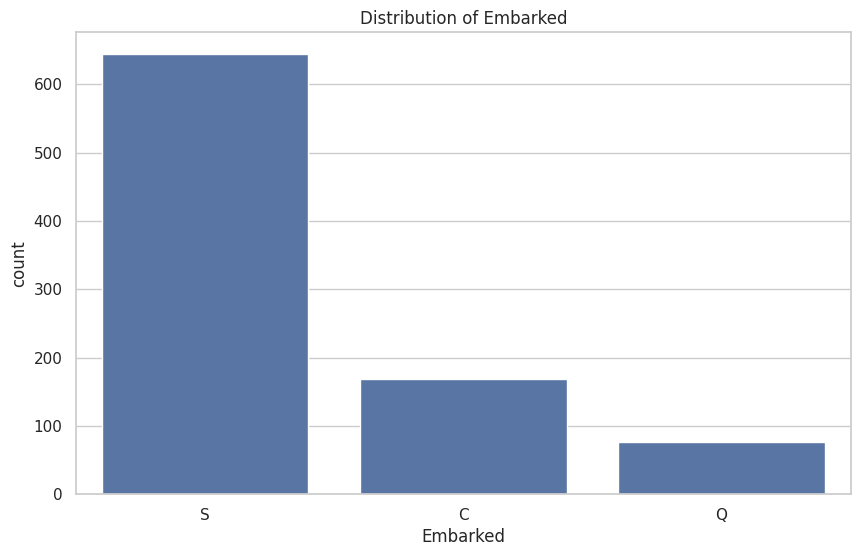

In [8]:
categorical_cols = ['Sex', 'Pclass', 'Embarked']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

# 4. Numerical data histograms

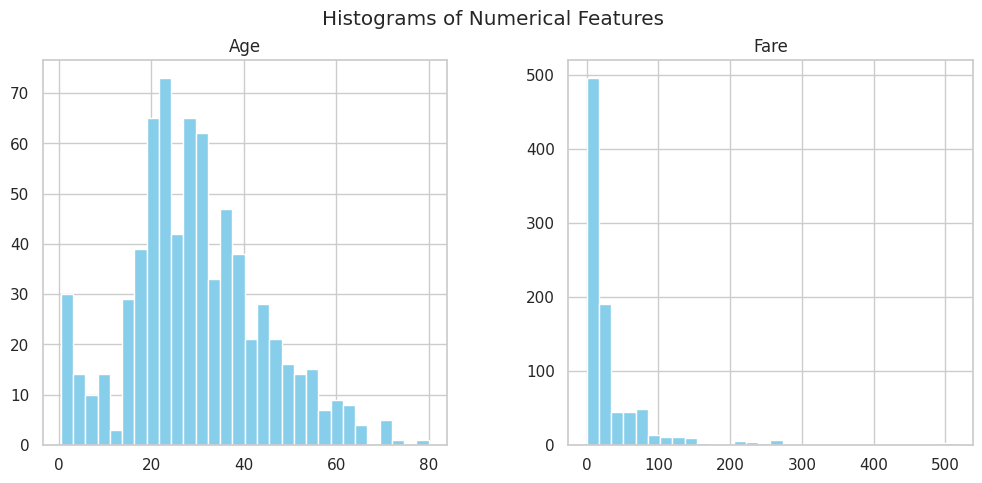

In [9]:
numerical_cols = ['Age', 'Fare']
df[numerical_cols].hist(bins=30, figsize=(12, 5), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# 5. Box plots to detect outliers

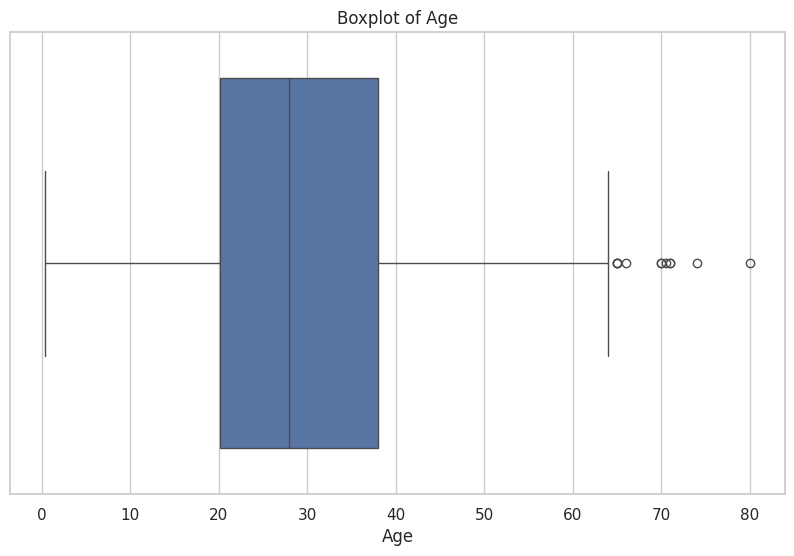

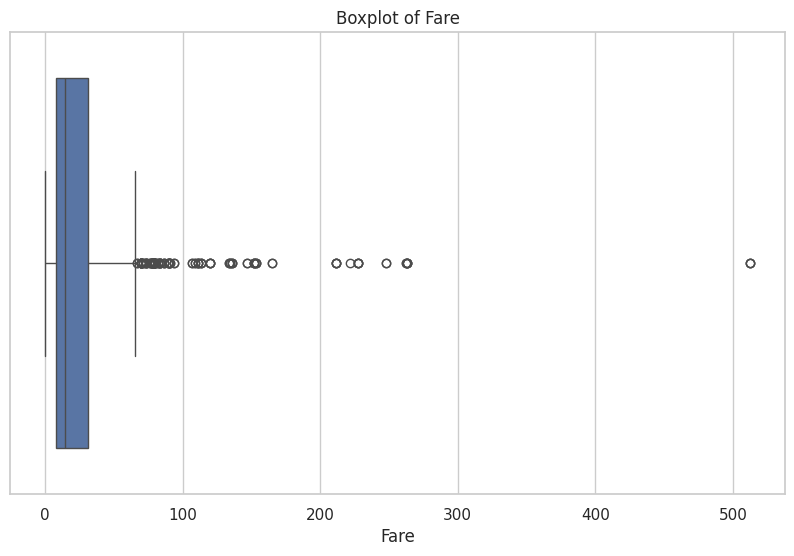

In [10]:
for col in numerical_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# 6. Survival count

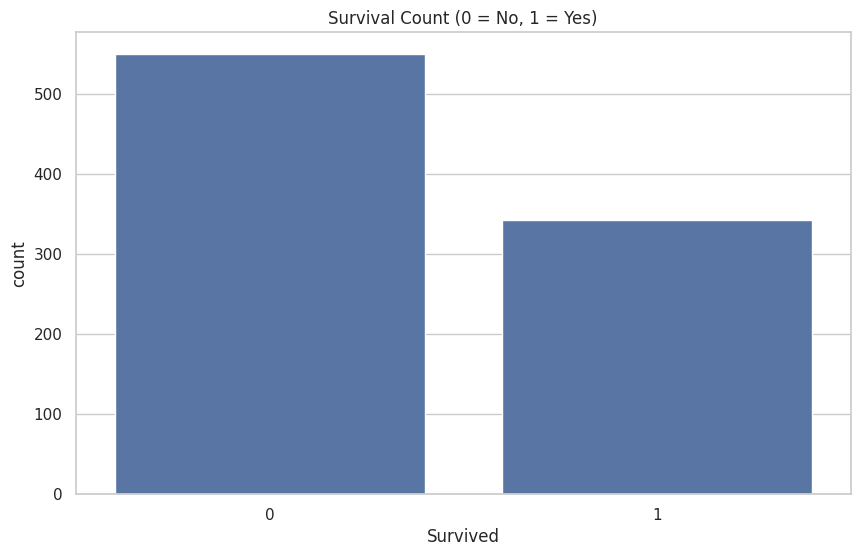

In [11]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# 7. Survival by Sex

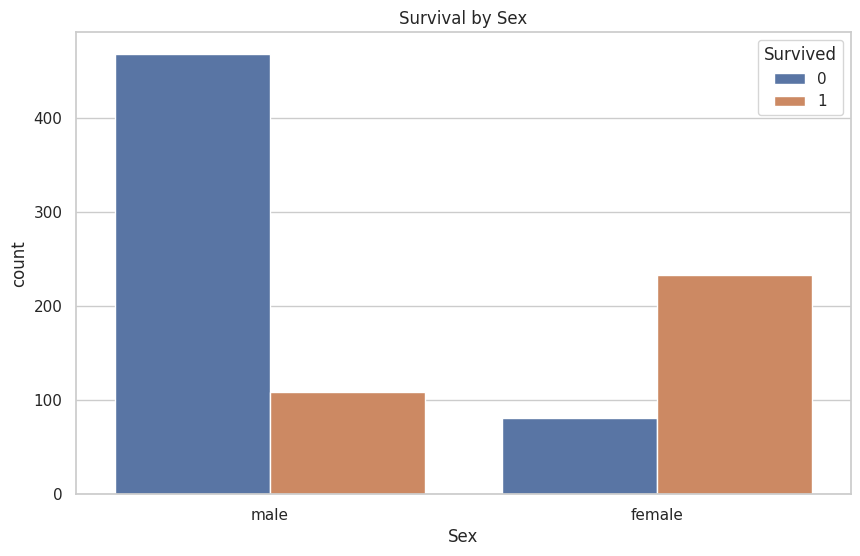

In [12]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

# 8. Survival by Pclass

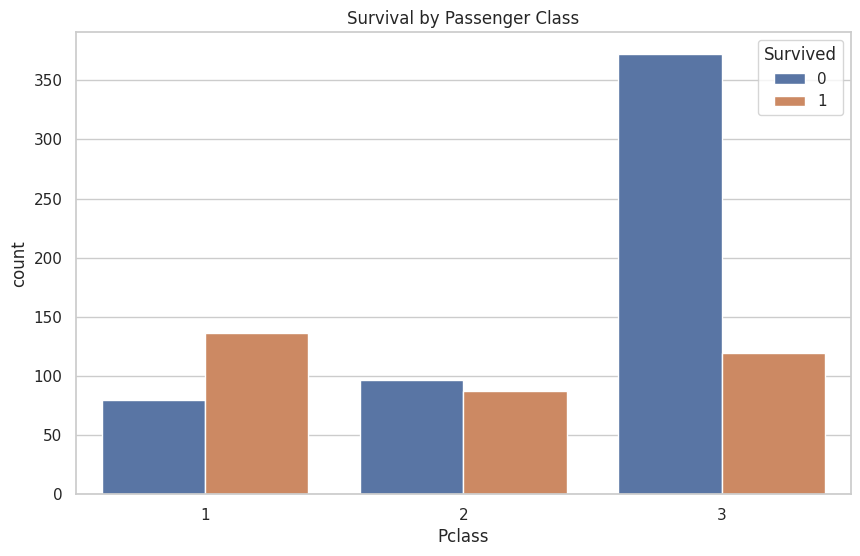

In [13]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

# 9. Survival by Embarked

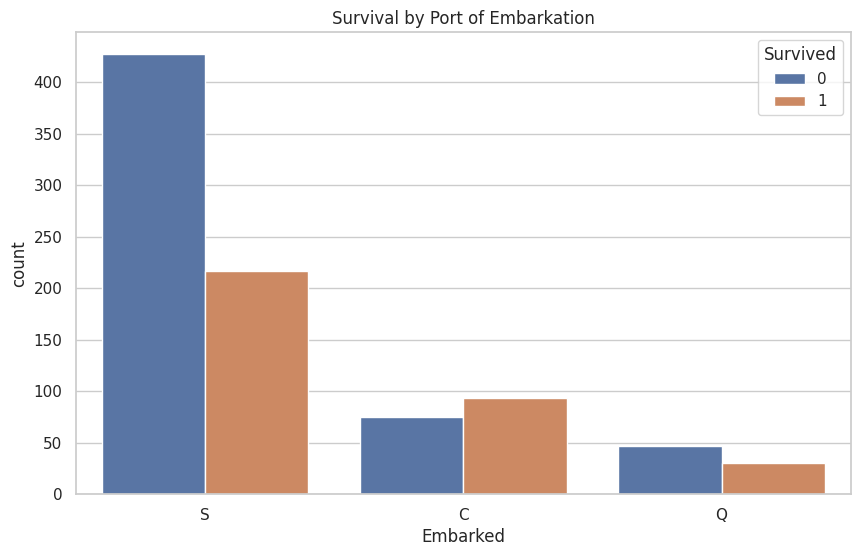

In [14]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Survival by Port of Embarkation")
plt.show()

# 10. Age distribution by survival

<ipython-input-15-3343547077>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
<ipython-input-15-3343547077>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)


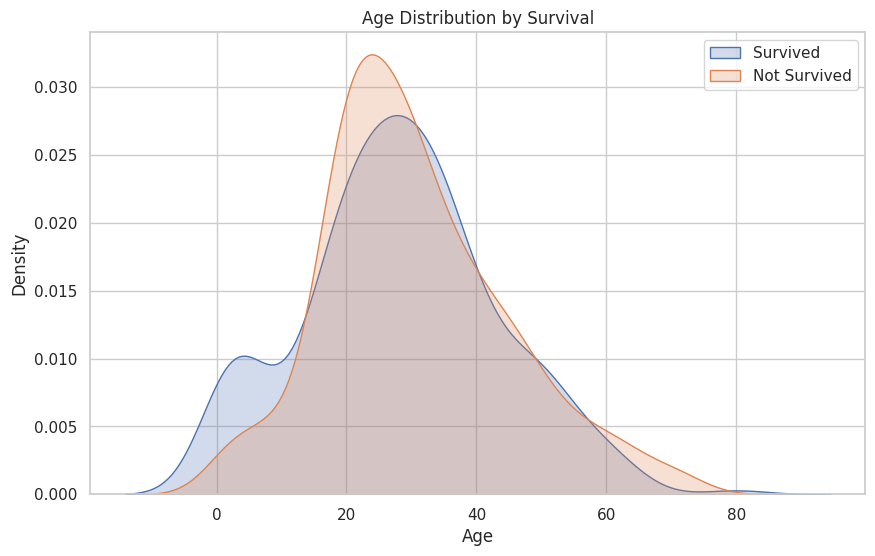

In [15]:
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

# 11. Correlation heatmap

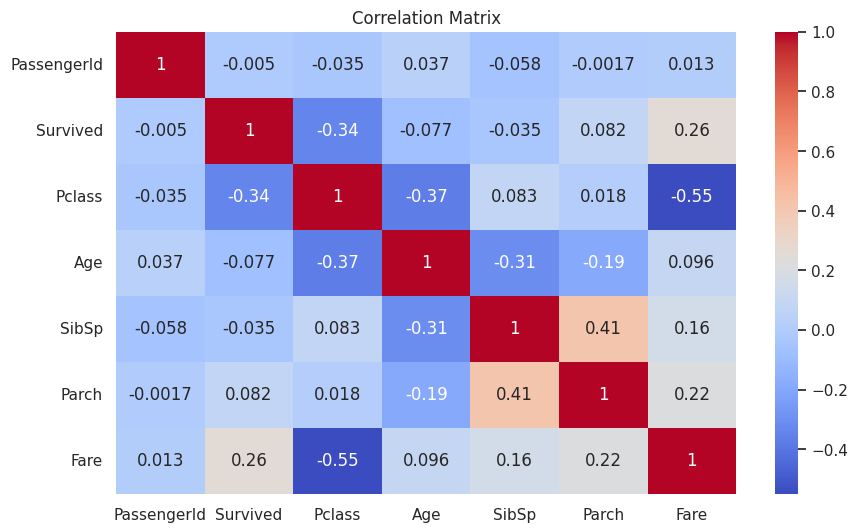

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 12. Grouped survival rates

In [17]:
print("\nSurvival Rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())

print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival Rate by Embarked:")
print(df.groupby('Embarked')['Survived'].mean())


Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
